# Convolutional Neural Networks (CNN/ ConvNet)

A Convolutional Neural Network, also known as CNN or ConvNet, is a class of neural networks that specailizes in processing data that has a grid-like topology such as an image.  Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity.

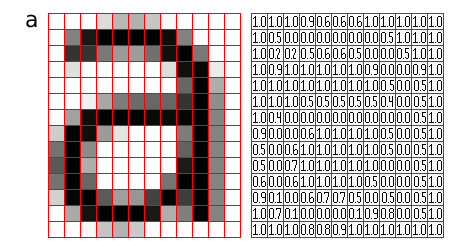

They are very similar to ANN in the sense that they too are made up of neurons that have learnable weights and biases.  Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. It takes an input image, assigns importances to various aspects/objects in the image and eb able to differentiate one from the other. The pre-processing required in a `ConvNet` is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough traning, ConvNets have the abilitiy to learn these filters/characteristics.

# Why ConvNets over Feed-Forward Neural Nets?

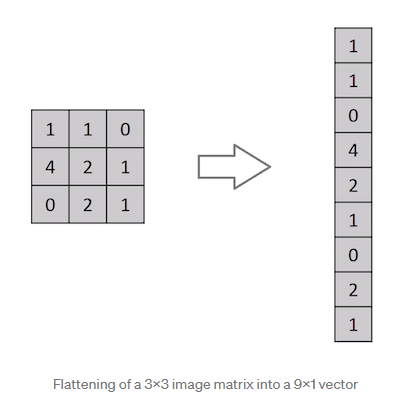

An image is nothing but a matrix of pixel values. So can we not just flatten the image and feed it to a Multi-Level Perceptron for classification purpose as shown in the above figure? 
- No Because, in cases of extremely basic binary images, the method might show an average precision score while performing prediction of classes but would have little to no accuracy when it comes to complex images having pixel dependencies throughout. 

A `ConvNet` is able to successfully capture the `Spatial and Temporal` dependencies in an image through the application of relevant filters. The architecture performs a better fitting to the image dataset due to the reduction in the number of parameters involved and reusability of weights. In other words, the network can be trained to understand the sophistication of the image better.


# Layers used to build ConvNets

A simple ConvNet is a sequence of layers, and every layer of a ConvNet transforms one volume of activations to another through a differentiable functions. There are mainly 3 types of layers to build ConvNet architectures: `Convolutional Layer, Pooling Layer, and Fully Connected Layer`. 

- Convolutional Layer: A Convolutional Layers will compute the output of neurons that are connected to the local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume using the filters/kernels.

- Pooling Layer: A Pooling Layer will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume. 

- Fully Connected Layer: A fully-connected layer will compute the class scores. As with ordinary Neural Networks and as the naem implies, each neuron in this layer will be connected to all the nubers in the previous volume.

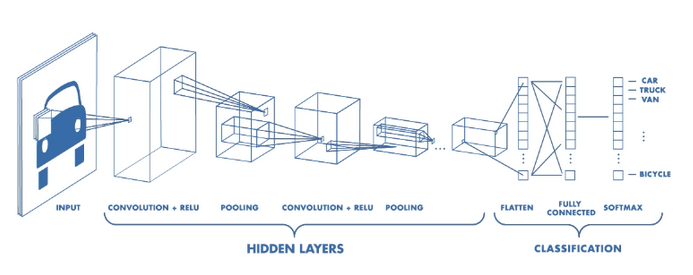

# Need of ConvNet

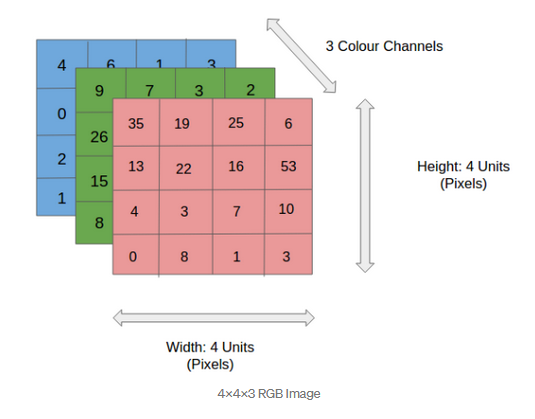

Let us consider we have an RGB image which has been separated by its three color planes -Red, Green, and Blue. Now, we can imagine how computationally intensive things would get once the images reach dimensions, say 8k. **The role of the ConvNet is to reduce the images into a form which is easier to process, without losing features which are critical for getting a good prediction.** 

# Convolutional Layer

The Convolutional Layer is the core building block of the CNN. It carries the main portion of the network's computational load. The layer performs a dot product between two matrices, where one matrix is the set of learnable parameters otherwise known as kernel, and the other matrix is the restricted portion of the receptive field. The kernel is spatially smaller than an image but is more in-depth. This means that, if the image is composed of three (RGB) channels, the kernel height and width will be spatially small, but the depth extends up to all three channels.

![gif](https://miro.medium.com/max/1400/1*ulfFYH5HbWpLTIfuebj5mQ.gif 'gif')

During the forward pass, the kernel slides across the height and width of the image-producing the image representation of that receptive region. This produces a two-dimensional representation of the image known as an activation map that gives the response of the kernel at each spatial position of the image. The sliding size of the kernel is called a stride.

During the forward pass, the kernel slides across the height and width of the image-producing the image representation of that receptive region. This produces a two-dimensional representation of the image known as an activation map that gives the response of the kernel at each spatial position of the image. The sliding size of the kernel is called a stride.

$$W_{out} = \frac{W-F+2P}{S}+1$$

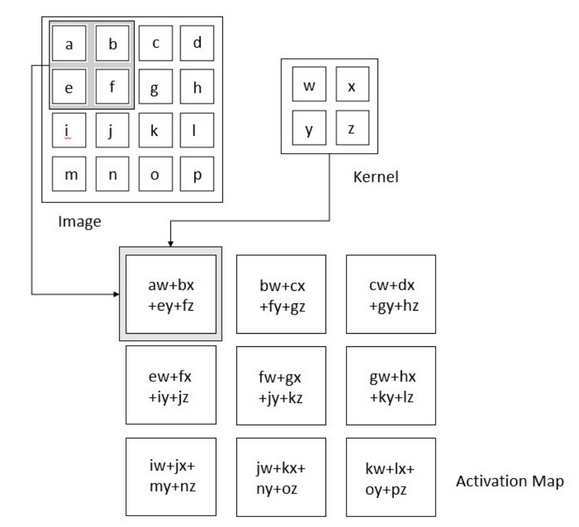


## Working of Convolutional Layer

![conv](https://miro.medium.com/max/1052/1*GcI7G-JLAQiEoCON7xFbhg.gif 'conv')

In the above image, we have the Input Dimension = 5 (Height) x 5 (Breadth) x 1 (Number of channels, eg:- RGB)

In the above demonstration, the green section resembles our 5x5x1 input image, I. The element involved in carrying out the convolution operation in the first part of a Convolutional Layer is called the Kernel/Filter, K, represented in the color yellow. We have selected K as a 3x3x1 matrix.

The Kernel shifts 9 times because of **Stride Length = 1 (Non-Strided)**, every time performing a matrix multiplication operation between K and the portion P of the image over which the kernel is hovering.
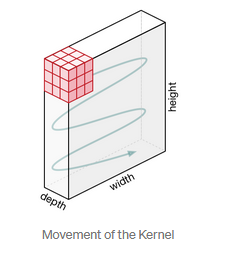

The filter moves to the right with a certain Stride Value till it parses the complete width. Moving on, it hops down to the beginning (left) of the image with the same Stride Value and repeats the process until the entire image is reversed. 

![conv](https://miro.medium.com/max/1400/1*ciDgQEjViWLnCbmX-EeSrA.gif 'conv')

In the case of images with multiple channels (e.g. RGB), the Kernel has the same depth as that of the input image. Matrix Multiplication is performed between Kn and In stack ([K1, I1]; [K2, I2]; [K3, I3]) and all the results are summed with the bias to give us a squashed one-depth channel Convoluted Feature Output.

![stride 2](https://miro.medium.com/max/790/1*1VJDP6qDY9-ExTuQVEOlVg.gif 'stride 2')

The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. ConvNets need not be limited to only one Convolutional Layer. 

There are two types of results to the operation — one in which the convolved feature is reduced in dimensionality as compared to the input, and the other in which the dimensionality is either increased or remains the same. This is done by applying Valid Padding in case of the former, or Same Padding in the case of the latter.

![](https://miro.medium.com/max/790/1*nYf_cUIHFEWU1JXGwnz-Ig.gif 'abc')

When we augment the 5x5x1 image into a 6x6x1 image and then apply the 3x3x1 kernel over it, we find that the convolved matrix turns out to be of dimensions 5x5x1. Hence the name — Same Padding.

On the other hand, if we perform the same operation without padding, we are presented with a matrix which has dimensions of the Kernel (3x3x1) itself — Valid Padding.

# Pooling Layer

The pooling layer replaces the output of the network at certain locations by deriving a summary statistic of the nearby outputs. This helps in reducing the spatial size of the representation, which decreases the required amount of computation and weights. The pooling operation is processed on every slice of the representation individually.

![](https://miro.medium.com/max/792/1*uoWYsCV5vBU8SHFPAPao-w.gif '')
Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant, thus maintaining the process of effectively training of the model.


There are several pooling functions such as the average of the rectangular neighborhood, L2 norm of the rectangular neighborhood, and a weighted average based on the distance from the central pixel. However, the most popular process are `Max Pooling` and `Average Pooling`. `Max Pooling` returns the **maximum value** from the portion of the image covered by the Kernel. On the other hand, **Average Pooling** returns the **average of all the values** from the portion of the image covered by the Kernel.

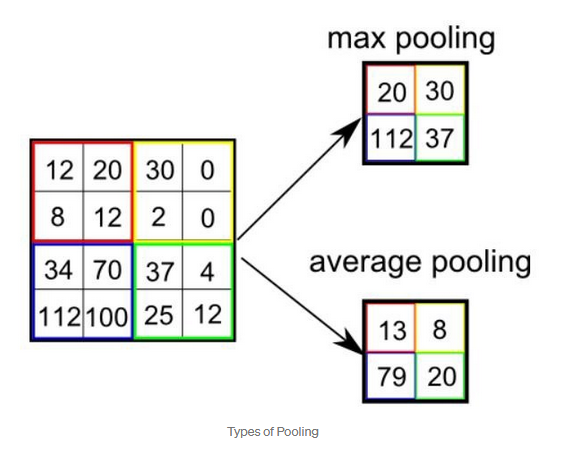

**Note:- Max Pooling also performs as a Noise Suppressant. It discards the noisy activations altogether and also performs de-noising along with dimensionality reduction. On the other hand, Average Pooling simply performs dimensionality reduction as a noise suppressing mechanism. Hence, we can say that Max Pooling performs a lot better than Average Pooling.**

If we have an activation map of size W x W x D, a pooling kernel of spatial size F, and stride S, then the size of output volume can be determined by the following formula:
$$W_{out}=\frac{W-F}{S}+1$$
This will yield an output volume of size Wout x Wout x D.

**Note: -In all cases, pooling provides some translation invariance which means that an object would be recognizable regardless of where it appears on the frame.**

The Convolutional Layer and the Pooling Layer, together form the i-th layer of a Convolutional Neural Network. Depending on the complexities in the images, the number of such layers may be increased for capturing low-levels details even further, but at the cost of more computational power.

# Fully Connected Layer

After going through the above process, we have successfully enabled the model to understand the features. Moving on, we are going to flatten the final output and feed it to a regular Neural Network for classification purposes.

Neurons in this layer have full connectivity with all neurons in the preceding and succeeding layer as seen in regular FCNN. This is why it can be computed as usual by a matrix multiplication followed by a bias effect. This layer helps to map the representation between the input and the output.

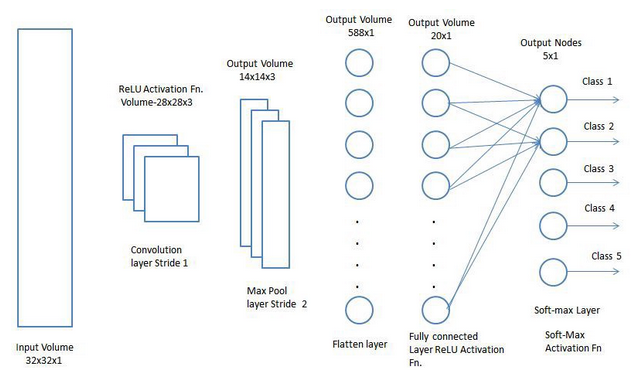

Adding a Fully-Connected layer is a (usually) cheap way of learning non-linear combinations of the high-level features as represented by the output of the convolutional layer. The Fully-Connected layer is learning a possibly non-linear function in that space.


Now that we have converted our input image into a suitable form for our Multi-Level Perceptron, we shall flatten the image into a column vector. The flattened output is fed to a feed-forward neural network and backpropagation applied to every iteration of training. Over a series of epochs, the model is able to distinguish between dominating and certain low-level features in images and classify them.

# Some popular CNN Architectures

There are various architectures of CNNs available which are listed below:
- LeNet
- AlexNet
- VCGNet
- GoogLeNet
- ResNet
- ZFNet